In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Flatten


## MOUNTING GOOGLE DRIVE

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/1471093-atm_bank_dataset.csv")

In [5]:
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [6]:
df = df.drop(['id','atm_name'],axis=1)

In [7]:
df.describe(include="all")

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244,2244,2244,2244,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
unique,7,5,2,8,NaN,NaN,NaN,NaN,NaN
top,SUNDAY,NH,W,WWW,NaN,NaN,NaN,NaN,NaN
freq,525,2079,1281,703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,NaN,NaN,NaN,NaN,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,NaN,NaN,NaN,NaN,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,NaN,NaN,NaN,NaN,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,NaN,NaN,NaN,NaN,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,NaN,NaN,NaN,NaN,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   weekday                 2244 non-null   object
 1   festival_religion       2244 non-null   object
 2   working_day             2244 non-null   object
 3   holiday_sequence        2244 non-null   object
 4   trans_date_set          2244 non-null   int64 
 5   trans_month             2244 non-null   int64 
 6   trans_year              2244 non-null   int64 
 7   prevweek_mean           2244 non-null   int64 
 8   total_amount_withdrawn  2244 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 157.9+ KB


In [9]:
df.nunique()

weekday                      7
festival_religion            5
working_day                  2
holiday_sequence             8
trans_date_set               7
trans_month                 12
trans_year                   7
prevweek_mean              338
total_amount_withdrawn    1969
dtype: int64

# CHECK NULL VALUES

In [10]:
df.isna().sum()

weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

# DROP DUPLICATES

In [11]:
df=df.drop_duplicates()

In [12]:
df.describe(include="all")

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244,2244,2244,2244,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
unique,7,5,2,8,NaN,NaN,NaN,NaN,NaN
top,SUNDAY,NH,W,WWW,NaN,NaN,NaN,NaN,NaN
freq,525,2079,1281,703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,NaN,NaN,NaN,NaN,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,NaN,NaN,NaN,NaN,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,NaN,NaN,NaN,NaN,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,NaN,NaN,NaN,NaN,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,NaN,NaN,NaN,NaN,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   weekday                 2244 non-null   object
 1   festival_religion       2244 non-null   object
 2   working_day             2244 non-null   object
 3   holiday_sequence        2244 non-null   object
 4   trans_date_set          2244 non-null   int64 
 5   trans_month             2244 non-null   int64 
 6   trans_year              2244 non-null   int64 
 7   prevweek_mean           2244 non-null   int64 
 8   total_amount_withdrawn  2244 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 175.3+ KB


# EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

<Axes: xlabel='count', ylabel='weekday'>

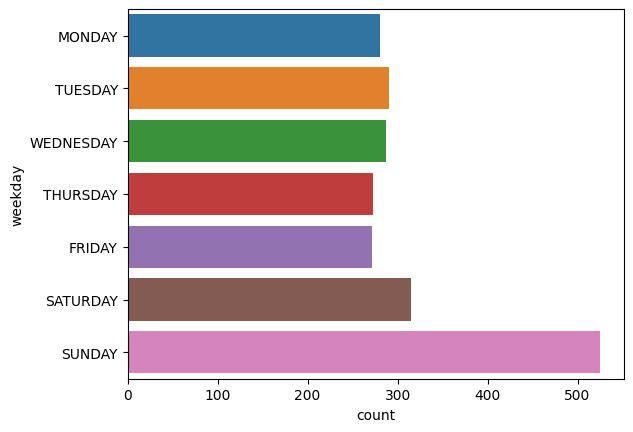

In [14]:
sns.countplot(data=df,y="weekday")

Text(0.5, 1.0, 'Total amount withdrawan')

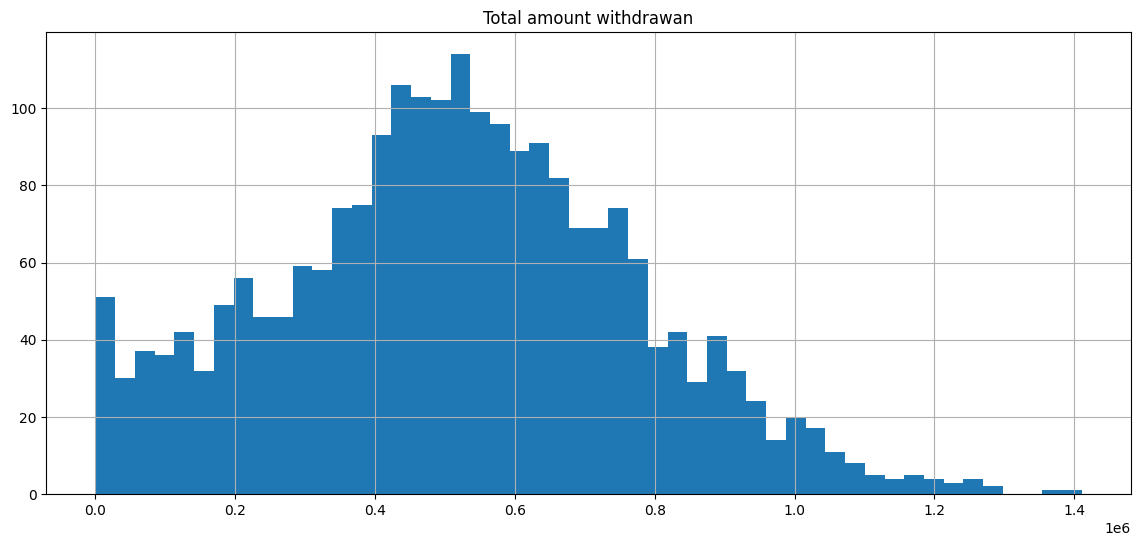

In [15]:
plt.figure(figsize=(14,6))
df['total_amount_withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')

# BI-VARIATE ANALYSIS

In [16]:
fig = px.bar(df, x="trans_year", y="total_amount_withdrawn", color="trans_year", barmode="group")
fig.show()

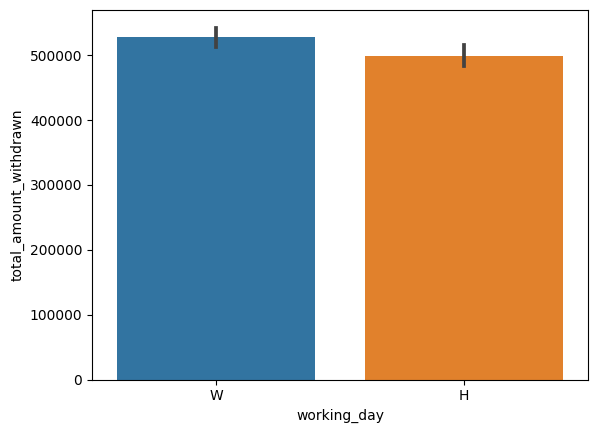

In [17]:
fig = sns.barplot(df, x="working_day", y="total_amount_withdrawn")


In [18]:
fig = px.ecdf(df, x="total_amount_withdrawn", color="working_day")
fig.show()

In [19]:
df1=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'],drop_first=True)

In [20]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']
x1=df1[['trans_year', 'prevweek_mean','working_day_W', 'holiday_sequence_HHW','holiday_sequence_HWH', 'holiday_sequence_HWW', 'holiday_sequence_WHH','holiday_sequence_WHW', 'holiday_sequence_WWH', 'holiday_sequence_WWW']]

x1

,trans_year,prevweek_mean,working_day_W,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,2011,648600,1,0,0,0,0,0,0,1
1,2011,648600,1,0,0,0,0,0,0,1
2,2011,648600,1,0,0,0,0,0,0,1
3,2011,648600,1,0,0,0,0,0,0,1
4,2011,648600,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2239,2017,276058,1,0,0,1,0,0,0,0
2240,2017,276058,1,0,0,0,0,0,0,1
2241,2017,276058,1,0,0,0,0,0,0,1
2242,2017,276058,1,0,0,0,0,0,1,0


<Axes: >

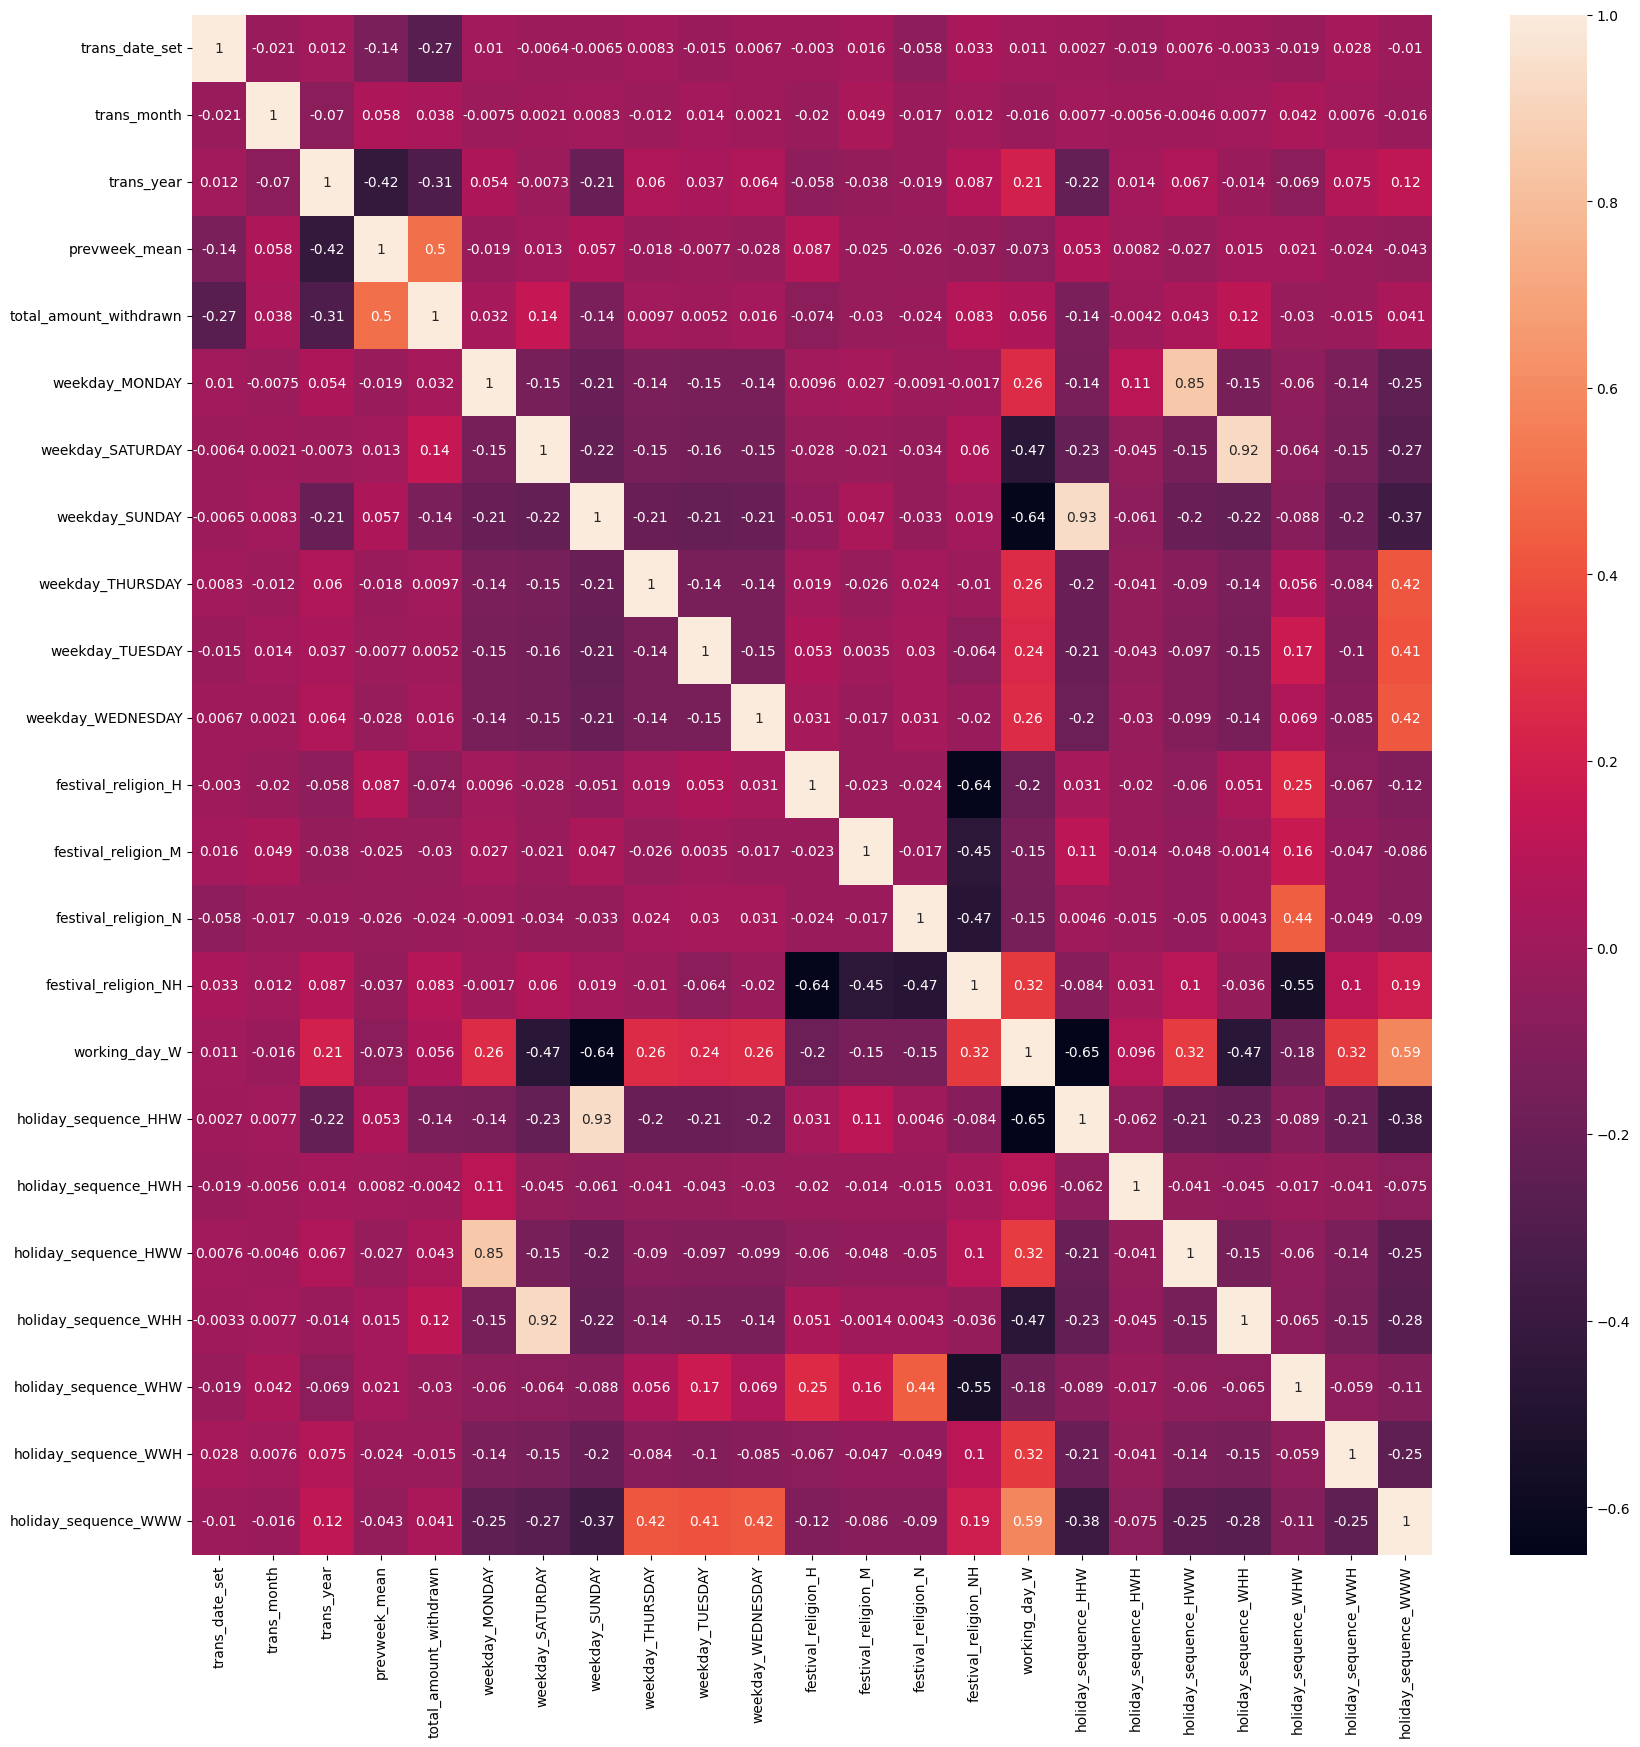

In [21]:
corr=df1.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr,annot=True)

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=.25)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1683, 10) (561, 10) (1683,) (561,)


In [23]:
x.columns

Index(['trans_date_set', 'trans_month', 'trans_year', 'prevweek_mean',
       'weekday_MONDAY', 'weekday_SATURDAY', 'weekday_SUNDAY',
       'weekday_THURSDAY', 'weekday_TUESDAY', 'weekday_WEDNESDAY',
       'festival_religion_H', 'festival_religion_M', 'festival_religion_N',
       'festival_religion_NH', 'working_day_W', 'holiday_sequence_HHW',
       'holiday_sequence_HWH', 'holiday_sequence_HWW', 'holiday_sequence_WHH',
       'holiday_sequence_WHW', 'holiday_sequence_WWH', 'holiday_sequence_WWW'],
      dtype='object')

In [24]:
xtrain.head(2)

,trans_year,prevweek_mean,working_day_W,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
1759,2015,379372,0,0,0,0,1,0,0,0
1347,2014,585272,0,0,0,0,0,0,0,0


# CREATE AN ARCHITECTURE

In [25]:
model = Sequential()
model.add(Dense(35,activation = 'relu',input_dim =10,kernel_initializer = 'he_normal'))
model.add(Dense(20,activation = 'relu',kernel_initializer = 'he_normal'))
model.add(Dense(15,activation = 'relu',kernel_initializer = 'he_normal'))
model.add(Dense(1,activation = 'linear'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                385       
                                                                 
 dense_1 (Dense)             (None, 20)                720       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1436 (5.61 KB)
Trainable params: 1436 (5.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.get_weights()

[array([[ 0.09018093,  0.13387893, -0.19979282,  0.24672657, -0.74071085,
          0.5616597 ,  0.8626337 , -0.35108232, -0.19109528,  0.03876678,
         -0.19085515,  0.02872266,  0.36904556, -0.68631613, -0.10177572,
          0.37375426,  0.37453333,  0.40956935, -0.01944372, -0.34243923,
          0.11430935, -0.06633343, -0.07691646,  0.41773158,  0.66215897,
         -1.0125355 , -0.0268488 ,  0.6539761 ,  0.09794719,  0.12200586,
         -0.7162012 , -0.53341126, -0.12782568,  0.6858857 ,  0.88297445],
        [ 0.83359385,  0.5376986 ,  0.823557  ,  0.5196439 , -0.4269683 ,
          0.93179417,  0.9052987 ,  0.23087168,  0.46907544, -0.34968284,
          0.51407367,  0.22686261, -0.57424265, -0.16018164, -0.890203  ,
          0.2006174 , -0.4863279 , -0.5321345 ,  0.5602679 ,  0.6058524 ,
          0.81887245, -0.16462569,  0.31002384,  0.13902438,  0.00806065,
          0.29877642, -0.51445395, -0.31477308, -0.9921274 ,  0.0473082 ,
         -0.17365462, -0.3007153 , -0

In [28]:
model.compile(
    optimizer='adam',
    loss='mse')

In [29]:
history = model.fit(xtrain,ytrain,epochs =500,validation_split=0.2)

Epoch 1/500
43/43 [==============================] - 1s 6ms/step - loss: 447901958144.0000 - val_loss: 108519440384.0000
Epoch 2/500
43/43 [==============================] - 0s 3ms/step - loss: 64761692160.0000 - val_loss: 55323828224.0000
Epoch 3/500
43/43 [==============================] - 0s 3ms/step - loss: 52403490816.0000 - val_loss: 54623162368.0000
Epoch 4/500
43/43 [==============================] - 0s 3ms/step - loss: 52318420992.0000 - val_loss: 54647984128.0000
Epoch 5/500
43/43 [==============================] - 0s 3ms/step - loss: 52378984448.0000 - val_loss: 54734962688.0000
Epoch 6/500
43/43 [==============================] - 0s 3ms/step - loss: 52273582080.0000 - val_loss: 54710775808.0000
Epoch 7/500
43/43 [==============================] - 0s 3ms/step - loss: 52331397120.0000 - val_loss: 54589661184.0000
Epoch 8/500
43/43 [==============================] - 0s 3ms/step - loss: 52330610688.0000 - val_loss: 54685650944.0000
Epoch 9/500
43/43 [===========================

In [30]:
model.get_weights()

[array([[-2.1170151e+00, -3.2994432e+00,  2.8834779e+00, -6.7869550e-01,
         -7.4071085e-01, -1.0523905e+00,  4.2202067e+00,  1.5389152e+00,
         -1.8057907e+00,  3.8766779e-02, -1.3900577e+00,  2.8398414e+00,
          3.6904556e-01, -6.8631613e-01, -1.0177572e-01,  3.4968791e+00,
          3.7453333e-01,  4.0956935e-01,  3.3502531e+00,  2.5518069e+00,
         -1.5572139e+00, -6.6333428e-02,  3.4794731e+00,  1.5683255e+00,
          3.9031639e+00,  1.7967192e+00, -2.6848797e-02,  1.5541797e+00,
          9.7947188e-02,  3.7668335e+00, -7.1620119e-01, -5.3341126e-01,
         -1.2782568e-01,  5.3936172e+00,  4.3586988e+00],
        [ 3.4841859e-01,  4.7403955e-01,  6.9940883e-01,  4.1619167e-01,
         -4.2696831e-01,  7.1491855e-01,  8.2520074e-01,  1.0943079e-01,
          3.4859988e-01, -3.4968284e-01,  3.3344680e-01,  2.1292666e-01,
         -5.7424265e-01, -1.6018164e-01, -8.9020300e-01,  2.9682729e-03,
         -4.8632789e-01, -5.3213447e-01,  5.1157504e-01,  5.427215

In [31]:
ypred=model.predict(xtest)
from sklearn import metrics

MAE_M1=metrics.mean_absolute_error(ytest, ypred)
MSE_M1=metrics.mean_squared_error(ytest, ypred)
RMSE_M1=np.sqrt(metrics.mean_squared_error(ytest, ypred))
R2_M1=metrics.r2_score(ytest, ypred)
print("MAE",MAE_M1)
print("MSE",MSE_M1)
print("RMSE",RMSE_M1)
print("R2 score",R2_M1)

18/18 [==============================] - 0s 1ms/step
MAE 171102.85244680257
MSE 49231292356.42036
RMSE 221881.25733468423
R2 score 0.2576524662643964


# ARCHITECTURE 2

In [32]:
model = Sequential()
model.add(Dense(400,activation = 'tanh',input_dim = 10,kernel_initializer = 'glorot_normal'))
model.add(Dense(350,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(300,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(250,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(200,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(150,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(100,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(50,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(35,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(25,activation = 'tanh',kernel_initializer = 'glorot_normal'))

model.add(Dense(10,activation = 'tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(1,activation = 'linear'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 400)               4400      
                                                                 
 dense_5 (Dense)             (None, 350)               140350    
                                                                 
 dense_6 (Dense)             (None, 300)               105300    
                                                                 
 dense_7 (Dense)             (None, 250)               75250     
                                                                 
 dense_8 (Dense)             (None, 200)               50200     
                                                                 
 dense_9 (Dense)             (None, 150)               30150     
                                                                 
 dense_10 (Dense)            (None, 100)              

In [34]:
model.compile(
    optimizer='sgd',
    loss='mse')

In [35]:
history1 = model.fit(xtrain,ytrain,epochs =500,validation_split=0.2)

Epoch 1/500
43/43 [==============================] - 1s 12ms/step - loss: 85339619328.0000 - val_loss: 65855614976.0000
Epoch 2/500
43/43 [==============================] - 0s 7ms/step - loss: 65407688704.0000 - val_loss: 64038678528.0000
Epoch 3/500
43/43 [==============================] - 0s 7ms/step - loss: 65100161024.0000 - val_loss: 73717071872.0000
Epoch 4/500
43/43 [==============================] - 0s 7ms/step - loss: 66091188224.0000 - val_loss: 65273966592.0000
Epoch 5/500
43/43 [==============================] - 0s 8ms/step - loss: 65114685440.0000 - val_loss: 65015406592.0000
Epoch 6/500
43/43 [==============================] - 0s 8ms/step - loss: 65041350656.0000 - val_loss: 64886468608.0000
Epoch 7/500
43/43 [==============================] - 0s 9ms/step - loss: 65068834816.0000 - val_loss: 64350437376.0000
Epoch 8/500
43/43 [==============================] - 0s 8ms/step - loss: 65169555456.0000 - val_loss: 66933145600.0000
Epoch 9/500
43/43 [============================

In [36]:
ypred=model.predict(xtest)
from sklearn import metrics

MAE_M2=metrics.mean_absolute_error(ytest, ypred)
MSE_M2=metrics.mean_squared_error(ytest, ypred)
RMSE_M2=np.sqrt(metrics.mean_squared_error(ytest, ypred))
R2_M2=metrics.r2_score(ytest, ypred)
print("MAE",MAE_M2)
print("MSE",MSE_M2)
print("RMSE",RMSE_M2)
print("R2 score",R2_M2)

18/18 [==============================] - 0s 3ms/step
MAE 207479.16811497326
MSE 67052073273.152016
RMSE 258944.15087650082
R2 score -0.01106306261107104


# ARCHITECTURE -3

In [37]:
model = Sequential()
model.add(Dense(20,activation = 'sigmoid',input_dim = 10,kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(15,activation = 'sigmoid',kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'sigmoid',kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8,activation = 'sigmoid',kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5,activation = 'sigmoid',kernel_initializer = 'uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'linear'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                220       
                                                                 
 batch_normalization (Batch  (None, 20)                80        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_17 (Dense)            (None, 15)                315       
                                                                 
 batch_normalization_1 (Bat  (None, 15)                60        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 15)               

In [39]:
model.compile(
    optimizer='RMSProp',
    loss='mse')

In [40]:
history2 = model.fit(xtrain,ytrain,batch_size=100,epochs =500)

Epoch 1/500
17/17 [==============================] - 2s 3ms/step - loss: 329383641088.0000
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 329383575552.0000
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 329383411712.0000
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 329383378944.0000
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 329383280640.0000
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 329383215104.0000
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 329383116800.0000
Epoch 8/500
17/17 [==============================] - 0s 3ms/step - loss: 329383018496.0000
Epoch 9/500
17/17 [==============================] - 0s 3ms/step - loss: 329382952960.0000
Epoch 10/500
17/17 [==============================] - 0s 3ms/step - loss: 329382821888.0000
Epoch 11/500
17/17 [==============================] - 0s 3ms/step - loss: 329382723584.00

In [41]:
ypred=model.predict(xtest)
from sklearn import metrics

MAE_M3=metrics.mean_absolute_error(ytest, ypred)
MSE_M3=metrics.mean_squared_error(ytest, ypred)
RMSE_M3=np.sqrt(metrics.mean_squared_error(ytest, ypred))
R2_M3=metrics.r2_score(ytest, ypred)
print("MAE",MAE_M3)
print("MSE",MSE_M3)
print("RMSE",RMSE_M3)
print("R2 score",R2_M3)

18/18 [==============================] - 0s 2ms/step
MAE 518894.8548425141
MSE 335568786869.7779
RMSE 579282.9937688296
R2 score -4.059965916148476


# ARCHITECTURE -4

In [42]:
model=Sequential()
model.add(Dense(22,activation='relu',input_dim=10))
model.add(Dense(20,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(16,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(optimizer='Adam',loss="mse")

In [43]:
model.fit(xtrain,ytrain,batch_size=10,epochs=500)
y_pred=model.predict(xtest)

Epoch 1/500
169/169 [==============================] - 2s 2ms/step - loss: 183956963328.0000
Epoch 2/500
169/169 [==============================] - 0s 2ms/step - loss: 53768466432.0000
Epoch 3/500
169/169 [==============================] - 0s 2ms/step - loss: 53327994880.0000
Epoch 4/500
169/169 [==============================] - 0s 2ms/step - loss: 53262618624.0000
Epoch 5/500
169/169 [==============================] - 0s 2ms/step - loss: 53163507712.0000
Epoch 6/500
169/169 [==============================] - 0s 3ms/step - loss: 53518131200.0000
Epoch 7/500
169/169 [==============================] - 1s 3ms/step - loss: 53015871488.0000
Epoch 8/500
169/169 [==============================] - 1s 4ms/step - loss: 53634236416.0000
Epoch 9/500
169/169 [==============================] - 1s 3ms/step - loss: 53387878400.0000
Epoch 10/500
169/169 [==============================] - 1s 4ms/step - loss: 52947771392.0000
Epoch 11/500
169/169 [==============================] - 1s 3ms/step - loss: 53

In [44]:
from sklearn import metrics

MAE_M4=metrics.mean_absolute_error(ytest, ypred)
MSE_M4=metrics.mean_squared_error(ytest, ypred)
RMSE_M4=np.sqrt(metrics.mean_squared_error(ytest, ypred))
R2_M4=metrics.r2_score(ytest, ypred)
print("MAE",MAE_M4)
print("MSE",MSE_M4)
print("RMSE",RMSE_M4)
print("R2 score",R2_M4)

MAE 518894.8548425141
MSE 335568786869.7779
RMSE 579282.9937688296
R2 score -4.059965916148476


In [45]:
COL=['Model1','Model2','Model3','Model4']
data={"MAE":[MAE_M1,MAE_M2,MAE_M3,MAE_M4],"MSE":[MSE_M1,MSE_M2,MSE_M3,MSE_M4],
      "RMSE":[RMSE_M1,RMSE_M2,RMSE_M3,RMSE_M4],
      "R2_Score":[R2_M1,R2_M2,R2_M3,R2_M4]
      }
result=pd.DataFrame(data=data,index=COL)
result

,MAE,MSE,RMSE,R2_Score
Model1,171102.852447,4.923129e+10,221881.257335,0.257652
Model2,207479.168115,6.705207e+10,258944.150877,-0.011063
Model3,518894.854843,3.355688e+11,579282.993769,-4.059966
Model4,518894.854843,3.355688e+11,579282.993769,-4.059966


### **MODEL3 AND MODEL4 ARE THE BEST ARCHITECTURES OF THE ABOVE PROBLEM STATEMENT**